# Homework 1

Use a Chebyshev method to solve the second order ordinary differential equation

$$ u''(t) + a u'(t) + b u(t) = f(t) $$

from $t=0$ to $t=1$ with initial conditions $u(0) = 1$ and $u'(0) = 0$.

1. Do a grid convergence study to test the accuracy of your method.
* Setting $f(t)=0$, experiment with the values $a$ and $b$ to identify two regimes with qualitatively different dynamics.

## Differentiating shifted/scaled Chebyshev polynomials

Let $x \in [-1,1]$ denote the reference interval.  Suppose we wish to construct a well-conditioned Chebyshev basis on some interval $t(x)$.  In this example,

$$ t(x) = (x + 1) / 2 $$

so that $t \in [0,1]$.  This transformation is invertible, yielding

$$ x(t) = 2 t - 1 .$$

Now we can transform any function $f(x)$ to $f(x(t))$ and compute its derivatives via the chain rule

$$ \frac{d f}{d t} = \frac{df}{dx} \frac{dx}{dt} .$$

In our example $dx/dt = 2$.  This process can be applied repeatedly for higher derivatives.

1.042175e+05 0.377732


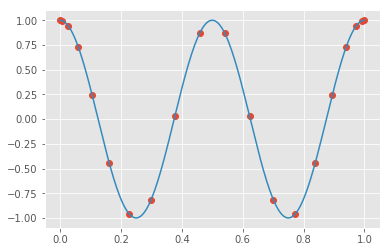

In [1]:
%matplotlib inline
%run fdtools.py
import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

def discretize(n, a, b, frhs=lambda t:0*t, verbose=False):
    t = cosspace(0, 1, n)
    T = chebeval(2*t - 1)
    T[1] *= 2
    T[2] *= 4
    A = T[2] + a*T[1] + b*T[0]
    A[0] = T[0][0]
    A[-1] = T[1][0]
    rhs = frhs(t)
    rhs[0] = 1
    rhs[-1] = 0
    A = A @ numpy.linalg.inv(T[0])
    if verbose:
        print('{:e} {:f}'.format(numpy.linalg.cond(A),
              numpy.linalg.norm(A) / numpy.linalg.norm(T[2] @ numpy.linalg.inv(T[0]))))
    return t, A, rhs

t, A, rhs = discretize(20, 0, (4*numpy.pi)**2, verbose=True)
u = numpy.linalg.solve(A, rhs)

pyplot.plot(t, u, 'o')
tt = numpy.linspace(0, 1, 200)
pyplot.plot(tt, numpy.cos(4*numpy.pi*tt));

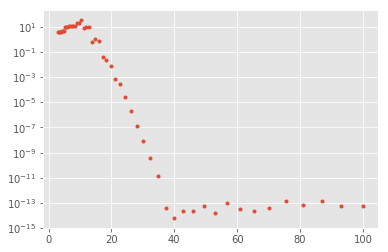

In [2]:
def mms_error(n):
    """This is lazy by not testing 'a' or 'frhs' nonzero."""
    t, A, rhs = discretize(n, 0, (8*numpy.pi)**2)
    u = numpy.linalg.solve(A, rhs)
    return numpy.linalg.norm(u - numpy.cos(8*numpy.pi*t), numpy.inf)

ns = numpy.logspace(.5,2)
errors = list(map(mms_error, ns))
pyplot.semilogy(ns, errors, '.');

## Dynamics

The differential equation

$$ u'' + a u' + b u = 0 $$

can be analyzed by inspecting the roots of the characteristic equation

$$ x^2 + a x + b = 0. $$

When the discriminant
$$ a^2 - 4 b $$
is positive, we get all-real roots, thus non-oscillatory decay.  When the discriminant is negative, we get complex roots, thus (damped) oscillations.

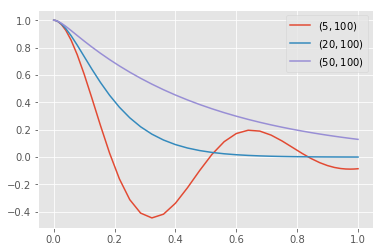

In [3]:
def plot_solution(a, b):
    t, A, rhs = discretize(40, a, b)
    pyplot.plot(t, numpy.linalg.solve(A, rhs), label='$({:g},{:g})$'.format(a, b))
    
plot_solution(5, 100)  # discriminant < 0
plot_solution(20, 100) # discriminant = 0
plot_solution(50, 100) # discriminant > 0
pyplot.legend();